In [1]:
import sympy
from sympy import Matrix, Rational, sqrt, symbols, zeros
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt

# Mathematics for Machine Learning

## Session 06: Dimensions

## Gerhard Jäger

### November 7, 2024

## The complete solution to a system of equations

Back to our example from last time:

$$
\begin{aligned}
A & =
\begin{bmatrix}
1 & 2& 3\\
2 & 4 & 3\\
3 & 6 & 1
\end{bmatrix}\\[1em]
\mathbf b &= \begin{bmatrix} 4\\ 5\\ 4\end{bmatrix}\\[1em]
A\mathbf x &= \mathbf b
\end{aligned}
$$



- first step: apply Gauss-Jordan elimination to the augmented matrix

$$
\left[\begin{array}{rrr|r}
1 & 2 & 3 & 4\\
2 & 4 & 3 & 5\\
3 & 6 & 1 & 4
\end{array}\right]\\
\left[\begin{array}{rrr|r}
1 & 2 & 3 & 4\\
0 & 0 & -3 & -3\\
0 & 0 & -8 & -8
\end{array}\right]\\
\left[\begin{array}{rrr|r}
1 & 2 & 3 & 4\\
0 & 0 & -3 & -3\\
0 & 0 & 0 & 0
\end{array}\right]\\
\left[\begin{array}{rrr|r}
1 & 2 & 0 & 1\\
0 & 0 & -3 & -3\\
0 & 0 & 0 & 0
\end{array}\right]\\
\left[\begin{array}{rrr|r}
1 & 2 & 0 & 1\\
0 & 0 & 1 & 1\\
0 & 0 & 0 & 0
\end{array}\right]\\
$$

- second step: find canonical solution by setting the slots corresponding to the free columns to 0 and solving via substitution

$$
\mathbf x_c = \begin{bmatrix}1\\0\\1\end{bmatrix}
$$

- third step: find the null space of $A$

$$
\mathbf x_0 = \begin{bmatrix}-2\\1\\0\end{bmatrix}
$$

The complete solution is the set of vectors $$\mathbf x_c + \alpha~\mathbf x_0,$$ for any real number $\alpha$.

## Rank of a matrix

Geometrically speaking, the **rank** of a matrix is the number of dimensions covered by its column space.



## examples of an invertable and a non-invertable matrix in 3d

$$
\begin{aligned}
A &= 
\begin{bmatrix}
1 & -4 & 2\\
-2 & 1 & 3\\
2 & 6 & 8
\end{bmatrix}\\[1em]
A^{-1} &=
\begin{bmatrix}
\frac{5}{63} & - \frac{22}{63} & \frac{1}{9}\\- \frac{11}{63} & - \frac{2}{63} & \frac{1}{18}\\\frac{1}{9} & \frac{1}{9} & \frac{1}{18}
\end{bmatrix}\\[1em]
B &= 
\begin{bmatrix}
1 & -4 & 2\\
-2 & 1 & 3\\
2 & 6 & -10
\end{bmatrix}\\[1em]
B^{-1}& \text{ is undefined}
\end{aligned}
$$

<IPython.core.display.Javascript object>


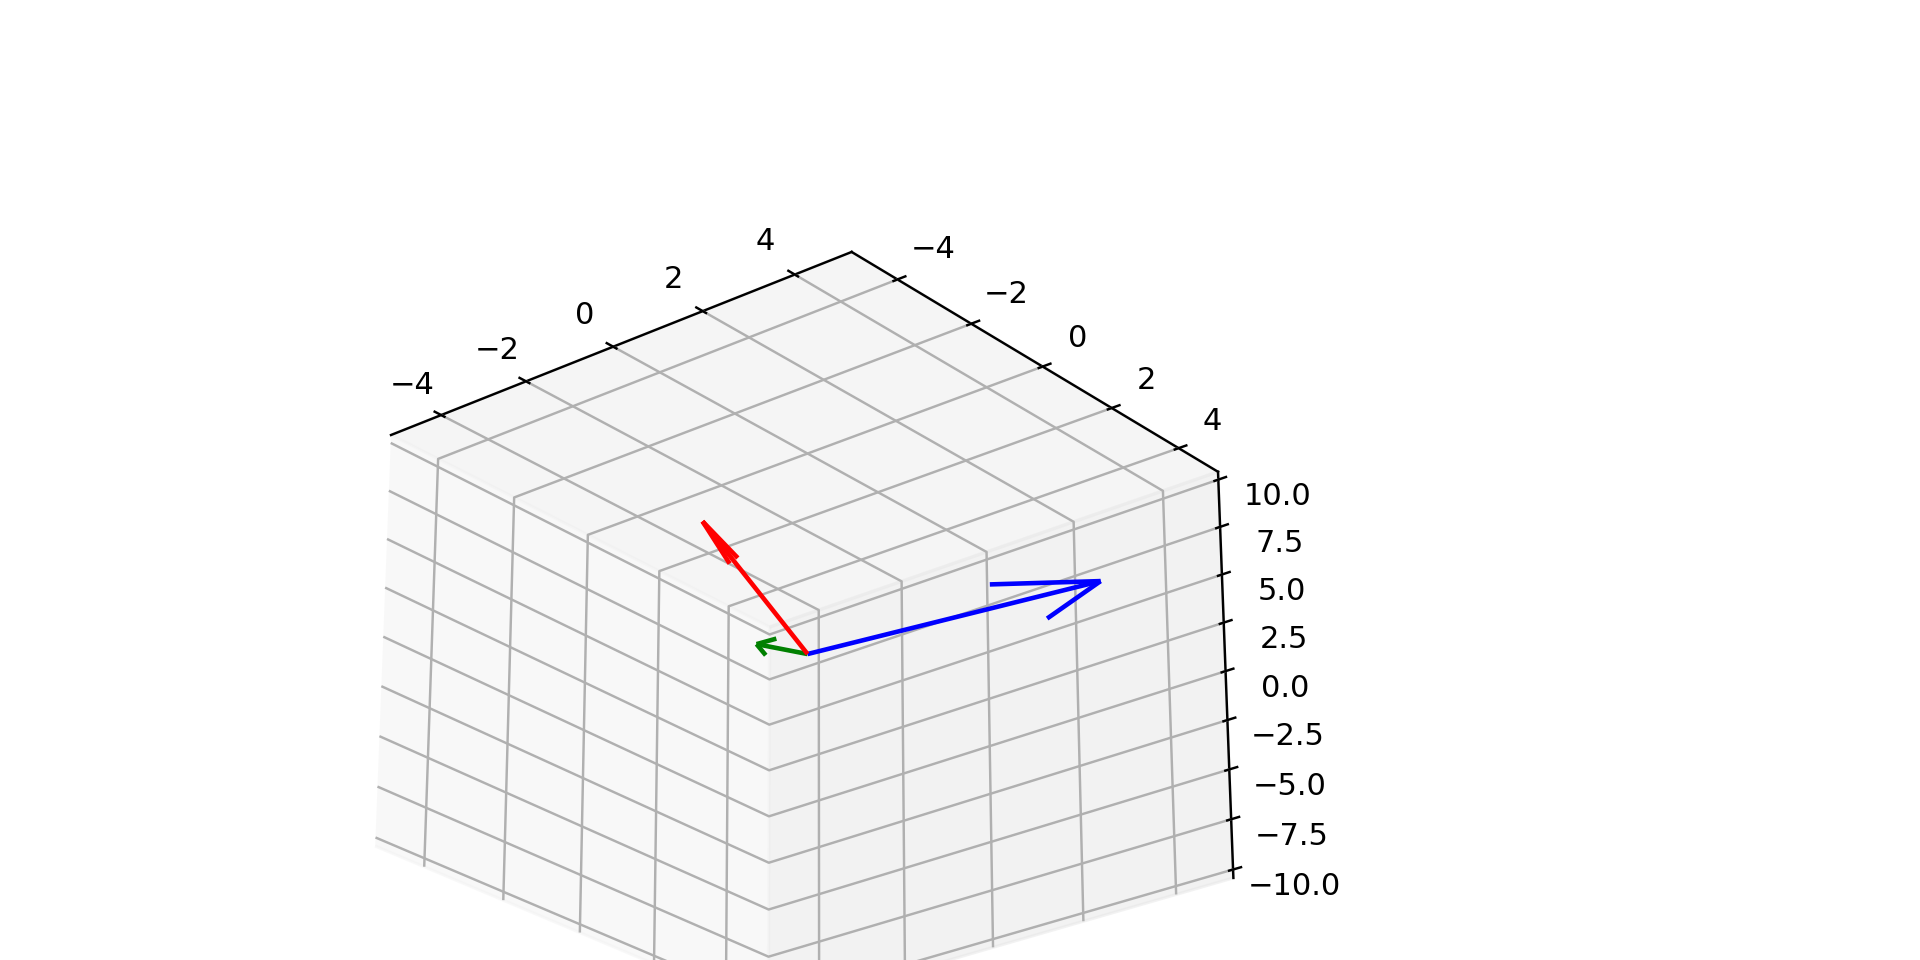

In [2]:

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(121, projection='3d')



ax.set_xlim(-5,5)
ax.set_ylim(-5,5)
ax.set_zlim(-10,10)
ax.quiver((0,),(0,),(0,),(1,),(-4,),(2,), color='red', length=1)
ax.quiver((0,),(0,),(0,),(-2,),(1,),(3,), color='green', length=1)
ax.quiver((0,),(0,),(0,),(2,),(6,),(8,), color='blue', length=1)

plt.show()


<IPython.core.display.Javascript object>


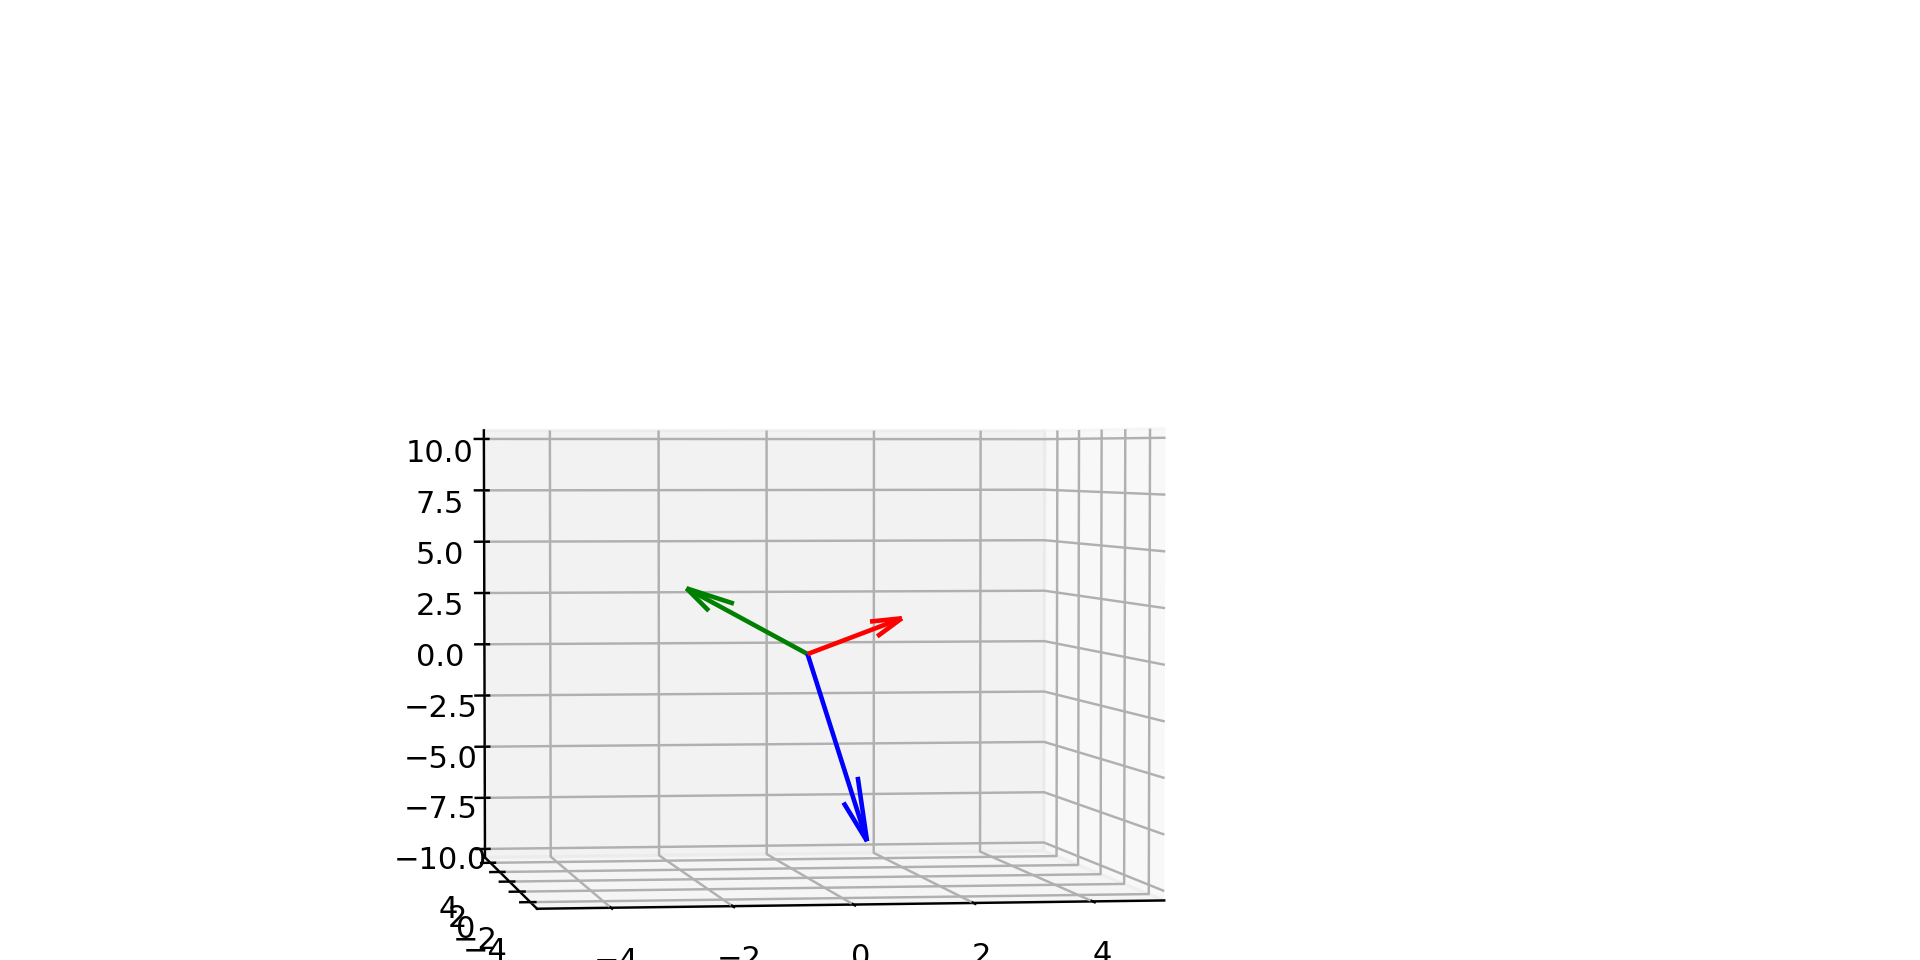

In [3]:

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(121, projection='3d')



ax.set_xlim(-5,5)
ax.set_ylim(-5,5)
ax.set_zlim(-10,10)
ax.quiver((0,),(0,),(0,),(1,),(-4,),(2,), color='red', length=1)
ax.quiver((0,),(0,),(0,),(-2,),(1,),(3,), color='green', length=1)
ax.quiver((0,),(0,),(0,),(2,),(6,),(-10,), color='blue', length=1)

plt.show()


- the invertable matrix has rank 3
- the non-invertable matrix has rank 2

### Fact: 

The rank of a matrix equals the number of pivots in its row echelon form, which is equal to the number of pivots in its reduced row echelon form.

- rank-3 matrix:

$$
\begin{aligned}
A &= 
\begin{bmatrix}
1 & -4 & 2\\
-2 & 1 & 3\\
2 & 6 & 8
\end{bmatrix}
\end{aligned}
$$

- row echelon form:

$$
\left[\begin{array}{r}
1 & -4 & 2\\
-2 & 1 & 3\\
2 & 6 & 8
\end{array}\right]\\
\left[\begin{array}{r}
1 & -4 & 2\\
0 & -7 & 7\\
0 & 14 & 4
\end{array}\right]\\
\left[\begin{array}{r}
1 & -4 & 2\\
0 & -7 & 7\\
0 & 0 & 28
\end{array}\right]\\
$$

The row echelon form has 3 pivots, so $A$ has rank 3.




$$
\left[\begin{array}{r}
1 & -4 & 0\\
0 & -7 &0\\
0 & 0 & 28
\end{array}\right]\\
\left[\begin{array}{r}
1 & 0 & 0\\
0 & -7 &0\\
0 & 0 & 28
\end{array}\right]\\
\left[\begin{array}{r}
1 & 0 & 0\\
0 & 1 &0\\
0 & 0 & 1
\end{array}\right]\\
$$

The reduced row echolon form also has 3 pivots.
(For an invertable matrix, the reduced row echelon form is always the identity matrix.)

- rank-2 matrix

$$
\begin{aligned}
B &= 
\begin{bmatrix}
1 & -4 & 2\\
-2 & 1 & 3\\
2 & 6 & -10
\end{bmatrix}\\[1em]
\end{aligned}
$$

- row-echelon form

$$
\begin{bmatrix}
1 & -4 & 2\\
0 & -7 & 7\\
0 & 14 & -14
\end{bmatrix}\\[1em]
\begin{bmatrix}
1 & -4 & 2\\
0 & -7 & 7\\
0 & 0 & 0
\end{bmatrix}\\[1em]
$$

The row echelon form has two pivots, hence $B$ has rank 2.


- reduced row echelon form


$$
\begin{bmatrix}
1 & 0 & -2\\
0 & -7 & 7\\
0 & 0 & 0
\end{bmatrix}\\[1em]
\begin{bmatrix}
1 & 0 & -2\\
0 & 1 & -1\\
0 & 0 & 0
\end{bmatrix}\\[1em]
$$

The reduced row echelon form also has 2 pivots.

## Dimensionality of a vector space

### Linear independence of vectors

- a vector $\mathbf b$ is independent from a set of vectors $\mathbf a_1, \ldots, \mathbf a_n$ if and only if there are no real numbers $x_1,\ldots,x_n$ such that

$$
x_1\mathbf a_1 + \cdots + x_n\mathbf a_n = \mathbf b
$$

- a set of vectors $\mathbf a_1, \ldots, \mathbf a_n$ is linearly independent if and only if each $\mathbf a_i$ is linearly independent of the other vectors $\mathbf a_1,\ldots, \mathbf a_{i-1},\mathbf a_{i+1}, \ldots \mathbf a_n$.

Equivalently, the column vectors of a matrix $A$ are linearly independent if and only if the linear system

$$
A\mathbf x = \mathbf 0
$$

has as its only solution $\mathbf x = \mathbf 0$.

(Independence is important, e.g., for linear regression.)

#### Examples

- $\begin{bmatrix}1\\ 0\end{bmatrix}$ and $\begin{bmatrix}0\\ 1\end{bmatrix}$: dependent or independent?


- $\begin{bmatrix}1\\ 0\end{bmatrix}$ and $\begin{bmatrix}0\\ 0.00001\end{bmatrix}$: dependent or independent?


- $\begin{bmatrix}1\\ 1\end{bmatrix}$ and $\begin{bmatrix}-1\\ -1\end{bmatrix}$: dependent or independent?


- $\begin{bmatrix}1\\ 1\end{bmatrix}$ and $\begin{bmatrix}0\\ 0\end{bmatrix}$: dependent or independent?


- $\begin{bmatrix}a\\ b\end{bmatrix}, \begin{bmatrix}c\\ d\end{bmatrix}$ and $\begin{bmatrix}e\\ f\end{bmatrix}$: dependent or independent?



In [4]:
A = Matrix([
    [1,0,3],
    [2,1,5],
    [1,0,3]
])
A

Matrix([
[1, 0, 3],
[2, 1, 5],
[1, 0, 3]])

- are the columns dependent or independent?
- what is the rank of $A$?

In [5]:
A.nullspace()[0]

Matrix([
[-3],
[ 1],
[ 1]])

**A little puzzle**

A rectangular $m\times n$ matrix with $m<n$ cannot have independent columns. Why?

**Example**

In [6]:
B = Matrix([
    [1,0,1,5],
    [0,1,1,-3],
    [2,1,-1,-2]
])
B

Matrix([
[1, 0,  1,  5],
[0, 1,  1, -3],
[2, 1, -1, -2]])

In [7]:
B.rref()[0]

Matrix([
[1, 0, 0,  11/4],
[0, 1, 0, -21/4],
[0, 0, 1,   9/4]])

### Basis of a vector space

- the **span** of a set of vectors $\mathbf a_1,\ldots, \mathbf a_n$ is the set of their linear combinations, i.e., the set

$$
    \{x_1\mathbf a_1 + \cdots x_n\mathbf a_n|x_1,\ldots, x_n \in \mathbb R\}
$$

- the span of a set of vectors is a vector space

- a set of vectors $\mathbf a_1, \ldots, \mathbf a_n$ is a **basis of a vector space $S$** if and only if
    - $\mathbf a_1, \ldots, \mathbf a_n$ are linearly independent, and
    - the span of $\mathbf a_1, \ldots, \mathbf a_n$ is $S$.



What is the span of

- $\mathbf v_1 = \begin{bmatrix}1\\0\end{bmatrix}$ and $\mathbf v_2 = \begin{bmatrix}0\\1\end{bmatrix}$,


- $\mathbf v_1 = \begin{bmatrix}1\\0\end{bmatrix}, \mathbf v_2 = \begin{bmatrix}0\\1\end{bmatrix}$, and $\mathbf v_3 = \begin{bmatrix}4\\7\end{bmatrix}$,


- $\mathbf w_1 = \begin{bmatrix}1\\1\end{bmatrix}$ and $\mathbf w_2 = \begin{bmatrix} -1\\-1\end{bmatrix}$?

Which of these sets of vectors form a basis?

### Theorem

If the columns of $A$ and the columns of $B$ are both a basis for some vector space $S$, then $A$ and $B$ have the same number of columns.

#### Proof

Let $A$ be an $m\times n$ matrix and $B$ and $m\times k$ matrix. Suppose $k<n$

Since $B$ is a basis of the column space of $A$, there must be a solution $\mathbf x_i$
$$
B\mathbf x_i = \mathbf a_i 
$$

for each column vector $\mathbf a_i$ of $A$. Let 

$$
X = \begin{bmatrix}
\vdots & \cdots & \vdots\\
\mathbf x_1 & \cdots & \mathbf x_n\\
\vdots & \cdots & \vdots\\
\end{bmatrix}
$$
i.e., $X$ is the matrix with $\mathbf x_1,\ldots, \mathbf x_n$ as column vectors. It has the format $k\times n$.





Then it holds:

$$
A = BX
$$

Since $k<n$, $X$ is broader than high. Therefore its reduced row-echolon form must have free columns. Therefore there must be a non-zero solution $\mathbf y$ for 

$$
X\mathbf y = \mathbf 0
$$

It follows immediately that

$$
\begin{aligned}
X\mathbf y &= \mathbf 0\\
BX\mathbf y &= \mathbf 0\\
A\mathbf y &= \mathbf 0
\end{aligned}
$$

This is a contradiction, since by assumption, the columns of $A$ are linearly independent. 

$\dashv$

### Dimensions of a vector space

It follows that each basis of a vector space $S$ has the same number of vectors as elements. We call this number the **number of dimensions of $S$**.






Let us re-consider the invertible matrix from last week:

$$
\begin{aligned}
A &= 
\left[
\begin{array}{r}
1 & -4 & 2\\
-2 & 1 & 3\\
2 & 6 & 8
\end{array}\right]\\[1em]
A^{-1} &=
\left[\begin{array}{r}
\frac{5}{63} & - \frac{22}{63} & \frac{1}{9}\\- \frac{11}{63} & - \frac{2}{63} & \frac{1}{18}\\\frac{1}{9} & \frac{1}{9} & \frac{1}{18}
\end{array}\right]
\end{aligned}
$$

Solving $A\mathbf x = \mathbf 0$:


$$
\begin{aligned}
A\mathbf x &= \mathbf 0\\
A^{-1}A\mathbf x &= A^{-1}\mathbf 0\\
\mathbf x &= \mathbf 0
\end{aligned}
$$


So the columns of $A$ are independent (as are the columns of each invertible matrix). Let $\mathbf b$ be some arbitrary vector in $\mathbb R^3$.
$$
\begin{aligned}
A\mathbf x &= \mathbf b\\
\mathbf x &= A^{-1}\mathbf b\\
\end{aligned}
$$
This means that for each vector $\mathbf b$ in $\mathbb R^3$, we can find coefficients $x_1, x_2, x_3$ such that $\mathbf b = x_1\mathbf a_1 + x_2 \mathbf a_2 + x_3\mathbf a_3$. The columns of $A$ therefore are a basis for $\mathbb R^3$.

By an analogous argument, it follows that

**The columns of an invertible $n\times n$ matrix form a basis for $\mathbb R^n$**.

# The four subspaces of a matrix

So far we have looked at two subspaces of an $n\times m$ matrix $A$:

- the **column space** $C(A)$
- the **nullspace** $N(A)$

The transpose $A^T$ also has these two subspaces:

- the column space $C(A^T)$ is called the **row space of $A$**
- the null space $N(A^T)$ is called the **left nullspace of $A$**

What can we say about the number of dimensions of these four subspaces?

- dimensions of $C(A) \leq n$
- dimensions of $C(A^T) \leq m$

We want to do better than that!

### Subspaces of reduced row echelon form matrices

Let us start with matrices in reduced row echelon form. 

Example:

$$
R = \left[\begin{array}{r}
1 & 2 & 0 & -2& 0\\
0 & 0 & 1 & -1& 3\\
0 & 0 & 0 & 0 & 0
\end{array}\right]
$$

- columns $\mathbf r_1$ an $\mathbf r_3$ are pivot columns
- columns $\mathbf r_2, \mathbf r_4$ and $\mathbf r_5$ are free columns

**Observation**: The pivot columns form a basis for $C(R)$.

$$
\begin{aligned}
\mathbf r_2 &= 2\mathbf r_1\\
\mathbf r_4 &= -2\mathbf r_1-\mathbf r_3\\
\mathbf r_5 &=  3\mathbf r_3
\end{aligned}
$$

Remember that the *rank of $R$* is the number of pivot columns. Hence the rank of $R$ is the number of dimensions of the column space. In the example, this number is 2.

(Here this is only demonstrated with a single example, but the argument works for any matrix in reduced row echelon form.)

There is one special solution to $R\mathbf x = \mathbf 0$ for each free column of $R$:

$$
\begin{aligned}
\mathbf x_1 &= \left[\begin{array}{r}-2\\1\\0\\0\\0\end{array}\right]&
\mathbf x_2 &= \left[\begin{array}{r}2\\0\\1\\1\\0\end{array}\right]&
\mathbf x_2 &= \left[\begin{array}{r}0\\0\\-3\\0\\1\end{array}\right]
\end{aligned}
$$




With *sympy*:

In [8]:
R = Matrix([
    [1,2,0,-2,0],
    [0,0,1,-1,3],
    [0,0,0,0,0]
])
R

Matrix([
[1, 2, 0, -2, 0],
[0, 0, 1, -1, 3],
[0, 0, 0,  0, 0]])

In [9]:
x1, x2, x3 = R.nullspace()

In [10]:
x1

Matrix([
[-2],
[ 1],
[ 0],
[ 0],
[ 0]])

In [11]:
x2

Matrix([
[2],
[0],
[1],
[1],
[0]])

In [12]:
x3

Matrix([
[ 0],
[ 0],
[-3],
[ 0],
[ 1]])

Collecting them in a matrix:

$$
X = \left[\begin{array}{r}
-2 & 2 & 0\\
1 & 0 & 0\\
0 & 1 & -3\\
0 & 1 & 0\\
0 & 0 & 1
\end{array}\right]
$$

Now consider the system

$$
X\mathbf z = \mathbf 0
$$

Solving via substitution, this gives

$$
\begin{aligned}
-2z_1 + 2 z_2 &= 0\\
z_1 &= 0\\
z_2-3z_3 &= 0\\
z_2 &= 0\\
z_3 &= 0
\end{aligned}
$$

Therefore $\mathbf z = \mathbf 0$. The columns of $X$ are linearly independent, so they are a basis for $N(R)$.

There are as many columns in $X$ as there are free columns in $R$. If $r$ is the rank of $R$, there are $r$ pivot columns and $n-r$ free columns.

**The nullspace $N(R)$ has $n-r$ dimensions.**

## Dimensions of the row space of $R$

Now let us focus on the row space of $R$, which is the column space of 

$$
R^T = \left[\begin{array}{r}
1 & 0 & 0\\
2 & 0 & 0\\
0 & 1 & 0\\
-2 & -1 & 0\\
0 & 3 & 0
\end{array}\right]
$$

By the construction of reduced row echelon forms, each row of $R$, i.e. each column of $R^T$, either contains a pivot or it is all-zero. By the same argument, each pivot row of $R^T$ contains a $1$ in one column and $0$ in all other columns, and all pivot columns are different.

Two oberservations follow from this:

- The pivot columns are linearly independent.
- The pivot columns form a basis of $C(R^T)$.

Since the number of pivot columns equals $r$, the rank of $R$, **the row space of $R$ has $r$ dimensions**.


When we bring $R^T$ in reduced row echelon form, pivot columns remain pivot columns:


$$
\begin{aligned}
R^T &= \left[\begin{array}{r}
1 & 0 & 0\\
2 & 0 & 0\\
0 & 1 & 0\\
-2 & -1 & 0\\
0 & 3 & 0
\end{array}\right]\\
\mathrm{rref}(R^T) &= \left[\begin{array}{r}
1 & 0 & 0\\
0 & 0 & 0\\
0 & 1 & 0\\
0 & 0 & 0\\
0 & 0 & 0
\end{array}\right]
\end{aligned}
$$

Hence the number of dimensions of $N(R^T)$, the left nullspace of $R$, is $m-r$.


### Generalizing to all matrices

We found that for an $m\times n$ matrix $R$ in reduced row echelon form with rank $r$:

- the row space of $R$ and the column space of $R$ both have $r$ dimensions
- the null space of $R$ has $n-r$ dimensions
- the left null space of $R$ has $m-r$ dimensions

Next it will be shown that this holds not just for matrices in reduced row echelon form, but for all matrices $m\times n$ matrices.

Let 

$$
A = \left[\begin{array}{r}
-1 & -2 & -2 & 4 & -6\\
-2 & -4 & - \frac{7}{2} & \frac{15}{2} & - \frac{21}{2}\\
2 & 4 & 3 & -7 & 9
\end{array}\right]
$$

When performing Gauss-Jordan elimination, we multiply $A$ repeatedly with matrices from the left.





These matrices have one of two forms:

- elimination matrix, i.e. a matrix with 
    - $1$s at the diagonal,
    - one non-zero entry off the diagonal, and
    - $0$s everywhere else
- an invertible diagonal matrix, i.e., a matrix with 
    - non-zero entries along the diagonal and 
    - $0$ everywhere else

In [13]:
A = Matrix([
    [-1, -2, -2, 4, -6],
    [-2, -4, -Rational(7,2), Rational(15,2), -Rational(21,2)],
    [2,4,3,-7,9]
])
A

Matrix([
[-1, -2,   -2,    4,    -6],
[-2, -4, -7/2, 15/2, -21/2],
[ 2,  4,    3,   -7,     9]])

In [14]:
E1 = Matrix([
    [1, 0, 0],
    [-2, 1, 0],
    [0, 0, 1]
])
E1

Matrix([
[ 1, 0, 0],
[-2, 1, 0],
[ 0, 0, 1]])

In [15]:
B = E1 * A
B

Matrix([
[-1, -2,  -2,    4,  -6],
[ 0,  0, 1/2, -1/2, 3/2],
[ 2,  4,   3,   -7,   9]])

In [16]:
E2 = Matrix([
    [1, 0, 0],
    [0, 1, 0],
    [2, 0, 1]
])
E2

Matrix([
[1, 0, 0],
[0, 1, 0],
[2, 0, 1]])

In [17]:
B = E2 * B
B

Matrix([
[-1, -2,  -2,    4,  -6],
[ 0,  0, 1/2, -1/2, 3/2],
[ 0,  0,  -1,    1,  -3]])

In [18]:
E3 = Matrix([
    [1, 0, 0],
    [0, 1, 0],
    [0, 2, 1]
])
E3

Matrix([
[1, 0, 0],
[0, 1, 0],
[0, 2, 1]])

In [19]:
B = E3 * B
B

Matrix([
[-1, -2,  -2,    4,  -6],
[ 0,  0, 1/2, -1/2, 3/2],
[ 0,  0,   0,    0,   0]])

In [20]:
E4 = Matrix([
    [1, 4, 0],
    [0, 1, 0],
    [0, 0, 1]
])
E4

Matrix([
[1, 4, 0],
[0, 1, 0],
[0, 0, 1]])

In [21]:
B = E4 * B
B

Matrix([
[-1, -2,   0,    2,   0],
[ 0,  0, 1/2, -1/2, 3/2],
[ 0,  0,   0,    0,   0]])

In [22]:
D = Matrix([
    [-1, 0, 0],
    [0, 2, 0],
    [0, 0, 1]
])
D

Matrix([
[-1, 0, 0],
[ 0, 2, 0],
[ 0, 0, 1]])

In [23]:
B = D * B
B

Matrix([
[1, 2, 0, -2, 0],
[0, 0, 1, -1, 3],
[0, 0, 0,  0, 0]])

In [24]:
A.rref()[0]

Matrix([
[1, 2, 0, -2, 0],
[0, 0, 1, -1, 3],
[0, 0, 0,  0, 0]])

**Observations**:

- Elimination matrices and invertible diagonal matrices are invertible.
- Let $U$ be an invertable matrix. If a subset of the columns of $B$ form a basis of $C(B)$, than the corresponding columns of $UB$ form a basis for of $C(UB)$


The first statement should be obvious. To invert an elimination matrix, you only have to replace its non-zero off-diagonal entry with its negation.


In [25]:
E1

Matrix([
[ 1, 0, 0],
[-2, 1, 0],
[ 0, 0, 1]])

In [26]:
E1.inv()

Matrix([
[1, 0, 0],
[2, 1, 0],
[0, 0, 1]])

To invert an invertable diagonal matrix, you replace each diagonal entry with its inverse.

In [27]:
D

Matrix([
[-1, 0, 0],
[ 0, 2, 0],
[ 0, 0, 1]])

In [28]:
D.inv()

Matrix([
[-1,   0, 0],
[ 0, 1/2, 0],
[ 0,   0, 1]])

Now consider the second statement. Recall the running example

$$
A = \left[\begin{array}{r}
-1 & -2 & -2 & 4 & -6\\
-2 & -4 & - \frac{7}{2} & \frac{15}{2} & - \frac{21}{2}\\
2 & 4 & 3 & -7 & 9
\end{array}\right]
$$


Here $\{\mathbf a_1, \mathbf a_3\}$ form a basis for the column space.


In [29]:
D = A[:, [0,2]]
D

Matrix([
[-1,   -2],
[-2, -7/2],
[ 2,    3]])

In [30]:
D.solve(A)

Matrix([
[1, 2, 0, -2, 0],
[0, 0, 1, -1, 3]])

In [31]:
try:
    D.solve(zeros(2))
except:
    print("no solution")

no solution


We get from $A$ to $\begin{bmatrix}\mathbf a_1, \mathbf a_3\end{bmatrix}$ by multiplying $A$ with

$$
\begin{aligned}
W &= \begin{bmatrix}
1 & 0\\
0 & 0\\
0 & 1\\
0 & 0\\
0 & 0
\end{bmatrix}\\
AW &= D
\end{aligned}
$$

In general, $W$ is an $n\times k$ matrix, $k\leq n$, with exactly one 1 per column. Let us call such matrices *subset matrices*.

No let us assume:

- $U$ is invertable
- the columns of $BW$ form a basis for $C(B)$

We need to show that $UBW$ form a basis for $C(UB)$.

First we need to show that the columns of $UBW$ are linearly independent, i.e., $\mathbf 0$ is the only solution for

$$
UBW\mathbf x = \mathbf 0
$$

Suppose it is otherwise, i.e, $\mathbf x \neq \mathbf 0$.

Since $U$ is invertable:

$$
\begin{aligned}
U^{-1}UBW\mathbf x &= \mathbf 0\\
BW\mathbf x &= \mathbf 0
\end{aligned}
$$

This contradicts the assumption that $BW$ is a basis for $C(B)$.




By assumption, $BW$ is a basis for $C(B)$. This means that each column vector of $B$ is a linear combination of the column vectors of $BW$. This amounts to saying that there is a matrix $X$ such that

$$
BWX = B
$$

We need to show that $UBW$ is a basis for $UB$, i.e., that there is a matrix $Y$ with

$$
UBWY = UB
$$
For $Y=X$, this follows directly from the assumptions.

Taking everything together, it follows that **the columns of $A$ with the same indices as the pivot columns of rref($A$)** form a basis of $C(A)$.

Therefore $C(A)$ has the same number of dimensions as $C(\mathrm{rref}(A))$, which equals the rank of $A$.

Furthermore, if $U$ is invertible, $U^T$ is also invertible. Therefore, applying Gauss-Jordan elimination does not change the dimensionality of the row space either. Since matrices in reduced row echelon form have the same number of dimensions for the row space and the column space, this also applies to all matrices.





Finally $U$ is invertible. If 

$$
A\mathbf x = \mathbf 0,
$$

then 
$$
\begin{aligned}
UA\mathbf x &= U\mathbf 0 = \mathbf 0
\end{aligned}
$$

If 
$$
UA\mathbf x = \mathbf 0,
$$

then

$$
\begin{aligned}
U^{-1}UA\mathbf x &=  U^{-1}\mathbf 0\\
A\mathbf x &= \mathbf 0
\end{aligned}
$$

This entails that $A$ and $\mathrm{rref}(A)$ have the same nullspace, end therefore the same number of dimensions of their nullspaces.


### Intermediate summary

Let $A$ be an $m\times n$ matrix.

- The column space $C(A)$ has dimension $r$ (the rank of $A$).
- The nullspace $N(A)$ has dimension $n-r$.





What about the row space and the left nullspace?

Suppose $\mathbf x$ is in the left nullspace of $A$:

$$
A^T\mathbf x = \mathbf 0
$$

Let $U$ the the matrix that converts $A$ to the reduced row echelon form.

$$
UA = \mathrm{rref}(A)
$$

**Observation**

If $E$ is invertible, than for any matrix $D$, the column spaces of $D$ and of $DE$ are identical.

**Proof**

Suppose $\mathbf b$ is in the column space of $D$:

$$
\exists \mathbf x D\mathbf x = \mathbf b
$$

Then there is a $\mathbf y$ such that 

$$
DE\mathbf y = \mathbf b,
$$
namely $E^{-1}\mathbf x$.

Conversely, if $\mathbf b$ is in the column space of $DE$, then it is also in the column space of $D$.

$\dashv$

This means that multiplying a matrix on its right with an invertible matrix does not change the column space. Hence the 

$$
C(A^T) = C(A^TU^T) = C((UA)^T) = C(\mathrm{rref}(A)^T)
$$

Since the row space of $\mathrm{rref}(A)$ has $r$ dimensions, the same holds for the row space of $A$.

And if the row space of $A$, i.e., the column space of $A^T$, has $r$ dimensions, the null space of $A^T$, which is the left null space of $A$, must have $m-r$ dimensions.

### Summary

Let $A$ be an $m\times n$ matrix.

- The column space $C(A)$ and the row space $C(A^T)$ both have dimension $r$ (the rank of $A$).
- The nullspace $N(A)$ has $n-r$ dimensions.
- The left nullspace $N(A^T)$ has $m-r$ dimensions. 


## Orthogonality

Recall: vectors $\mathbf v$ and $\mathbf w$ are **orthogonal** if and only if

$$
\mathbf v^T \mathbf w = \mathbf 0
$$

#### Examples

- $\begin{bmatrix}1\\1 \\0\end{bmatrix}$, $\begin{bmatrix}0\\0 \\1\end{bmatrix}$


- $\begin{bmatrix}1\\1 \end{bmatrix}$, $\begin{bmatrix}2\\-2\end{bmatrix}$


- $\begin{bmatrix}1\\1 \\ 2\end{bmatrix}$, $\begin{bmatrix}-2\\-2\\2\end{bmatrix}$

- ..

### orthogonal spaces

Two vector spaces $\mathbf V$ and $\mathbf W$ are orthogonal if and only if

$$
\forall \mathbf v\in \mathbf V, \mathbf w \in \mathbf W. \mathbf v^T\mathbf w = \mathbf 0
$$

**Examples**

$$
\begin{aligned}
\mathbf V &= \{\begin{bmatrix}x\\0\end{bmatrix}: x \in \mathbb R\}\\[1em]
\mathbf W &= \{\begin{bmatrix}0\\y\end{bmatrix}: y \in \mathbb R\}\\
\end{aligned}
$$

These are of course the $x$-axis and $y$-axis of a 2d-space.

$$
\begin{aligned}
\mathbf V &= \{\begin{bmatrix}x\\y\\0\end{bmatrix}: x,y \in \mathbb R\}\\[1em]
\mathbf W &= \{\begin{bmatrix}0\\0\\z\end{bmatrix}: z \in \mathbb R\}\\
\end{aligned}
$$

These are the $x$-$y$ plane and the $z$-axis of a 3d-space.

$$
\begin{aligned}
\mathbf V &= \mathrm{span}(
\begin{bmatrix}
1\\
-1\\
0
\end{bmatrix},
\begin{bmatrix}
1\\
1\\
1
\end{bmatrix}
)\\[1em]
\mathbf W &= \mathrm{span}(\begin{bmatrix}-1\\-1\\2\end{bmatrix})\\
\end{aligned}
$$

How do we know whether $\mathbf V$ and $\mathbf W$ are orthogonal?

**Observation** Let $V$ and $W$ be two sets of vectors $\subseteq \mathbb R^n$. 

$\mathrm{span}(V)$ is orthogonal to $\mathrm{span}(W)$ if and only if for all $\mathbf v\in V, \mathbf w \in W$: $\mathbf v$ and $\mathbf w$ are orthogonal.

*Proof*

Suppose $\mathrm{span}(V)$ is orthogonal to $\mathrm{span}(W)$. If $\mathbf v\in V$, then $\mathbf v\in\mathrm{span}(V)$, and likewise for $\mathbf w$. Hence $\mathbf v$ and $\mathbf w$ are orthogonal.

Now suppose for all $\mathbf v\in V, \mathbf w \in W$: $\mathbf v$ and $\mathbf w$ are orthogonal. Let $\mathbf x\in\mathrm{span}(V)$ and $\mathbf y\in\mathrm{span}(W)$.

If $\mathbf x\in\mathrm{span}(V)$ and $\mathbf y\in\mathrm{span}(W)$, $\mathbf x = \sum_i r_i\mathbf v_i$, $\mathbf y = \sum_j s_j\mathbf w_j$ for $r_1,\ldots,r_{|V|}, s_1,\ldots,s_{|W|}\in \mathbb R$.

$$
\begin{aligned}
\mathbf x^T\mathbf y &= (\sum_i r_i\mathbf v_i)^T(\sum_j s_i\mathbf w_j)\\
        &= \sum_i (r_i\mathbf v_i)^T(\sum_j s_j\mathbf w_j)\\
        &= \sum_i \sum_j(r_i\mathbf v_i)^T( s_j\mathbf w_j)\\
        &= \sum_i \sum_jr_i\mathbf v_i^T( s_j\mathbf w_j)\\
        &= \sum_i \sum_jr_is_j\mathbf v_i^T\mathbf w_j\\
        &= \sum_i \sum_jr_is_j\mathbf 0\\
        &= \mathbf 0\\
\end{aligned}
$$

$\dashv$

**Observation**

Let $A$ be an $m\times n$ matrix. Then

- the column space $C(A)$ is orthogonal to the left null space $C(A^T)$, and
- the row space $C(A^T)$ is orthogonal to the null space $N(A)$.

*Proof*

The column space of $A$ is $\mathrm{span}(\{\mathbf a_i|1\leq i \leq n\})$. If $\mathbf x$ is in the left null space of $A$, this means that

$$
A^T \mathbf x = \mathbf 0
$$

It follows that 

$$
\forall i:\mathbf a_i^T\mathbf x = \mathbf 0
$$

Due to the previous observation, it follows that $C(A)$ is orthogonal to $N(A^T)$. 

The proof of the second statement is analogous.

$\dashv$

## Orthogonal projections

Suppose we have two vectors $\mathbf a$ and $\mathbf b$. We want to find the *orthogonal projection from $\mathbf a$ onto the line through $\mathbf b$*. This is a vector $\mathbf p$ with the properties:

- $\mathbf p = x\mathbf b$ ($\mathbf p$ lies on the line defined by $\mathbf a$)
- $\mathbf a - \mathbf p$ is orthogonal to $\mathbf b$

Here is how we find $\mathbf p$:

$$
\begin{aligned}
(\mathbf a - x\mathbf b)^T\mathbf b &= 0\\
(\mathbf a^T - x\mathbf b^T)\mathbf b &= 0\\
\mathbf a^T\mathbf b - x\mathbf b^T\mathbf b &= 0\\
\mathbf a^T\mathbf b &= x\mathbf b^T\mathbf b\\
x &= \frac{\mathbf a^T\mathbf b}{\mathbf b^T\mathbf b}\\
\mathbf p &= \frac{\mathbf a^T\mathbf b}{\mathbf b^T\mathbf b}\mathbf b\\
\end{aligned}
$$

- $\mathbf p$ is called the *projection of $\mathbf a$ onto the line throuhg $\mathbf b$*.
- $\mathbf e = \mathbf a - \mathbf p$ is called the *error*.
- $\mathbf p$ is the point on the line through $\mathbf b$ which is closest to $\mathbf a$, i.e., the point which minimizes the error.

## Orthogonal projections

Now suppose we have a matrix $A$ and a vector $\mathbf b$, and we want to find the *orthogonal projection of  $\mathbf b$ onto the* ***column space*** of $A$.

In other words, we want to find the point $\mathbf p$ which

- is in the column space of $A$, and
- minimizes the error $\mathbf b-\mathbf p$.




<img src=_img/projection.svg>

(image from https://medium.com/linear-algebra/part-17-projections-122aac21b07c)
    

- assumptions:

$$
\begin{aligned}
Ax &= \mathbf p\\
\mathbf p + \mathbf e &= \mathbf b\\
A^T\mathbf e &= \mathbf 0
\end{aligned}
$$

- finding the solution

Let us assume that the columns of $A$ are independent. (If this is not the case, we can replace $A$ by some basis of $C(A))$.





**Observation** $(A^TA)$ is invertible if and only if the columns of $A$ are independent.

*Proof*


Suppose $(A^TA)$ is invertible, and let $A\mathbf x = \mathbf 0$. Then it follows

$$
\begin{aligned}
A^TA\mathbf x &= A^T\mathbf 0\\
A^TA\mathbf x &= \mathbf 0\\
\mathbf x &= (A^TA)^{-1}\mathbf 0\\
&= \mathbf 0
\end{aligned}
$$
This entails that the columns of $A$ are independent.

Now suppose the columns of $A$ are independent. The Gauss-Jordan elimination factorizes

$$
A^T = E R,
$$
where $E$ is the combined elimination matrix and $R$ is the reduced row echelon form of $A^T$.

As shown earlier today, $E$ is invertible.

If the columns of $A$ are independent, $R$ contains $n$ pivot columns, and no free column. It follows that

$$
R^T R = \mathbf I,
$$

since the dot product of a pivot column with itself must be $1$, and the dot product of two different pivot columns must be $0$.



Then we have:

$$
\begin{aligned}
A^TA &= ERR^T E^T\\
&= E~\mathbf I~ E^T\\
&= E E^T\\
\end{aligned}
$$

By construction, $E$ is invertible. Therefore

$$
(A^TA)^{-1} = (E^{-1})^T E^{-1}
$$

$\dashv$

- deriving the solution:

$$
\begin{aligned}
A\mathbf x &= \mathbf p\\
\mathbf p + \mathbf e &= \mathbf b\\
A^T\mathbf e &= \mathbf 0\\
A^T\mathbf b &= A^T\mathbf p + A^T\mathbf e\\
A^T\mathbf b &= A^T\mathbf p\\
&= A^T A\mathbf x\\
\mathbf x &= (A^T A)^{-1}A^T\mathbf b\\
\mathbf p &= A(A^T A)^{-1}A^T\mathbf b\\
\end{aligned}
$$


See https://book.stat420.org/collinearity.html about the relevance of this for statistics.